In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sacc

In [7]:
truez_shear = '/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-10mpc-2026/cluster_shear_catalogs.hdf5'



### CLCosmoSim Data

<Figure size 700x400 with 0 Axes>

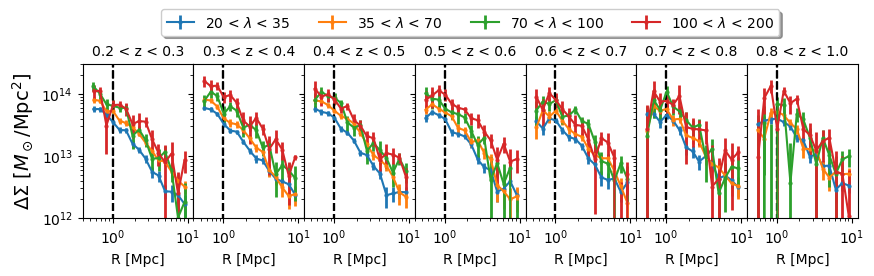

In [1]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
sys.path.append('/sps/lsst/users/ebarroso/CLCosmo_Sim')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
path_to_data = '/sps/lsst/users/ebarroso/CLCosmo_Sim_database/data/'
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,len(Z_bin), figsize = (10,2))
fig.subplots_adjust(wspace=0, hspace=0)
for i, z_bin in enumerate(Z_bin):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['gt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(1e12, 3e14)
            axs[i].set_xlim(0.4, 12)
            axs[i].set_xscale('log')
            axs[i].set_yscale('log')
            axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel('R [Mpc]', fontsize = 10)
            axs[i].set_title(label_z, fontsize = 10)
            axs[0].set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=14)
        #except: a=1
        
plt.legend(loc='upper center', bbox_to_anchor=(-2.5, 1.4),
          ncol=4, fancybox=True, shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
#plt.savefig('../fig/stacked_redmapper_profiles.png', bbox_inches='tight', dpi=100)

## Comparison calibrated to constantints data

('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_0')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_1')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_2')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_3')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_4')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_5')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_6')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_7')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_8')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_9')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_10')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_11')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_12')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_13')
('cosmodc2_redmapper', 'bin_rich_0', 'bin_z_2', 'radius_14')
('cosmodc2_redmapper', 'bin_rich_1', 'bin_z_2', 'radius_0')
('cosmodc2_redmapper', 'bin_rich_1'

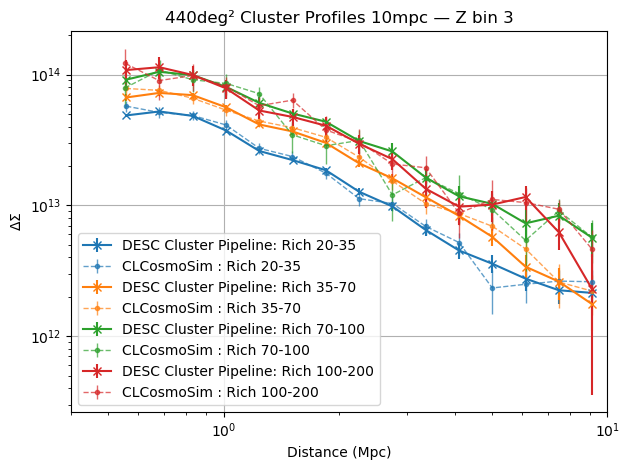

In [29]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
rich_bin_label = ["20-35","35-70", "70-100", "100-200"]

t1 = sacc.Sacc.load_fits("/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/cosmodc2/outputs-full-10mpc-2026/cluster_sacc_catalog.sacc")
# Color map to ensure consistent color across both plots
cmap = plt.get_cmap('tab10')  # Or use the same cmap as your SACC plots
z_bin_index = 2  # Third z-bin
z_bin = Z_bin[z_bin_index]
zbin = 'bin_z_2'
# Begin loop over richness bins
for rich_bin_index in range(4):
    rich_bin = f'bin_rich_{rich_bin_index}'
    color = cmap(rich_bin_index)  # Get consistent color per bin

    data_true = []
    data_true_error = []

    radius_vals = []

    for i in range(15):
        radius_key = f'radius_{i}'
        trac = ('cosmodc2_redmapper', rich_bin, zbin, radius_key)
        print(trac)
        radius = t1.tracers[radius_key].center
        radius_vals.append(radius)
        data_true.append(t1.get_data_points(sacc.data_types.standard_types.cluster_delta_sigma, trac)[0].value)
        index = t1.indices(sacc.data_types.standard_types.cluster_delta_sigma, trac)
        data_true_error.append(np.sqrt(t1.covariance.covmat[index][:, index][0, 0]))

    # Plot SACC profile
    plt.errorbar(
        radius_vals, data_true, yerr=data_true_error,
        label=f'DESC Cluster Pipeline: Rich {rich_bin_label[rich_bin_index]}', marker='x', color=color, linestyle='-'
    )

    # --- Overlay original profile (dashed line) from Z_bin[2] ---
    m_bin = Obs_bin[rich_bin_index]
    mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
    mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
    index_cut = np.where(mask_z & mask_m)[0]

    if len(index_cut) > 0:
        f_cut = profiles[index_cut]
        cov = np.array(covariances['cov_t'][index_cut])
        err = cov.T.diagonal()**0.5
        plt.errorbar(
            f_cut['radius'][0], f_cut['gt'][0], err[0],
            label=f'CLCosmoSim : Rich {rich_bin_label[rich_bin_index]}', fmt='--', color=color,
            elinewidth=1, linewidth=1, markersize=3, marker='o', alpha=0.7
        )
plt.xlabel('Distance (Mpc)')
plt.ylabel(r'$\Delta \Sigma$')
plt.title(f'440deg² Cluster Profiles 10mpc — Z bin {z_bin_index + 1}')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.4, 10)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



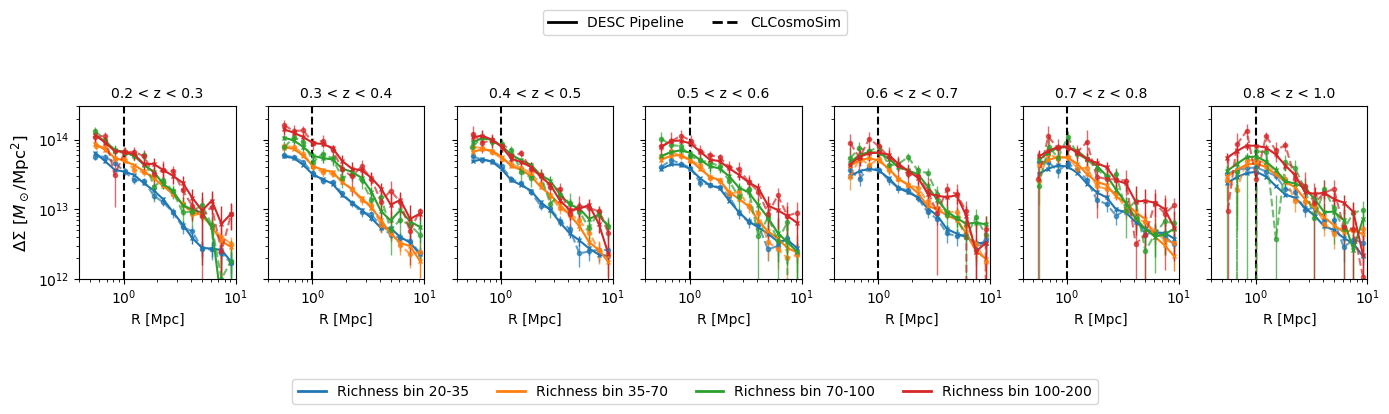

In [24]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# Load SACC catalog
t1 = sacc.Sacc.load_fits(
    "/sps/lsst/groups/clusters/cl_pipeline_project/TXPipe_data/"
    "cosmodc2/outputs-full-10mpc-2026/cluster_sacc_catalog.sacc"
)

cmap = plt.get_cmap('tab10')  # consistent colors for richness bins
n_z_bin = len(Z_bin)
n_r_bin = len(Obs_bin)
n_radius = 15

fig, axs = plt.subplots(1, n_z_bin, figsize=(14, 3), sharey=True)
fig.subplots_adjust(wspace=0, hspace=0)

# Keep track of legend handles
handles = []

for i, z_bin in enumerate(Z_bin):
    ax = axs[i]

    for j, m_bin in enumerate(Obs_bin):
        rich_bin = f'bin_rich_{j}'
        zbin = f'bin_z_{i}'
        color = cmap(j)

        radius_vals = []
        data_true = []
        data_true_error = []

        for k in range(n_radius):
            radius_key = f'radius_{k}'
            trac = ('cosmodc2_redmapper', rich_bin, zbin, radius_key)

            radius = t1.tracers[radius_key].center
            radius_vals.append(radius)

            data = t1.get_data_points(
                sacc.data_types.standard_types.cluster_delta_sigma, trac
            )[0].value
            idx = t1.indices(sacc.data_types.standard_types.cluster_delta_sigma, trac)
            error = np.sqrt(t1.covariance.covmat[idx][:, idx][0, 0])

            data_true.append(data)
            data_true_error.append(error)

        # Plot DESC pipeline
        desc_line = ax.errorbar(
            radius_vals, data_true, yerr=data_true_error,
            color=color, linestyle='-', marker='x', markersize=3, elinewidth=1
        )

        # Overlay Constantin
        mask_z = (profiles['z_mean'] > z_bin[0]) & (profiles['z_mean'] < z_bin[1])
        mask_m = (profiles['obs_mean'] > m_bin[0]) & (profiles['obs_mean'] < m_bin[1])
        index_cut = np.where(mask_z & mask_m)[0]

        if len(index_cut) > 0:
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal() ** 0.5

            const_line = ax.errorbar(
                f_cut['radius'][0], f_cut['gt'][0], yerr=err[0],
                color=color, linestyle='--', marker='o', markersize=3, alpha=0.7, elinewidth=1
            )

        # Only add one handle per color to legend
        if i == 0:  # only do for first panel
            handles.append((desc_line, const_line))

    # Axes formatting
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(0.4, 10)
    ax.set_ylim(1e12, 3e14)
    ax.vlines(1, 1e12, 3e14, ls='--', color='k')
    ax.set_title(f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}', fontsize=10)
    ax.set_xlabel('R [Mpc]', fontsize=10)
    if i == 0:
        ax.set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

from matplotlib.lines import Line2D

# --- Legend handles for line style ---
style_handles = [
    Line2D([0], [0], color='k', lw=2, linestyle='-', label='DESC Pipeline'),
    Line2D([0], [0], color='k', lw=2, linestyle='--', label='CLCosmoSim')
]

# --- Legend handles for richness colors ---
cmap = plt.get_cmap('tab10')
color_handles = [    Line2D([0], [0], color=cmap(j), lw=2, linestyle='-', label=f'Richness bin {binj}') for j,binj in enumerate(rich_bin_label)]

# --- Add legends separately ---
# Line style legend above figure
fig.legend(
    handles=style_handles,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    frameon=True
)

# Richness color legend below figure
fig.legend(
    handles=color_handles,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.05),
    ncol=len(Obs_bin),
    frameon=True
)

plt.tight_layout(rect=[0,0.05,1,0.95])  # leave space for both legends
plt.show()

